# Data Analysis

Below is a quick analysis making use of [`pandas`](http://pandas.pydata.org/) and [`seaborn`](http://seaborn.pydata.org/). Contrary to general methods, the data will be analysed across its attributes without formulating specific research questions first. The aim for this particular analysis is just to display an approach to cleaning, organising, and exploring data. As a rule of thumb, though, it is preferable to approach data analysis with a specific research question in mind (see the other files in this repository for a more classical analysis).

The dataset contains data regarding activities recorded by a sport tracker app across several locations.


In [1]:
import pandas as pd
import seaborn as sns

## A First Look at the Data

In [2]:
#load data
df = pd.read_csv('activities.csv', na_values=['?'])
print('There are ' + str(df.shape[0]) + ' records')
print('There are ' + str(df.columns.size) + ' attributes')

#what data types are featured in the dataset?
df.dtypes

There are 1000 records
There are 10 attributes


date         object
activity     object
duration    float64
distance    float64
type         object
user          int64
age           int64
gender       object
weight      float64
location     object
dtype: object

In [3]:
#take a look at the first couple of records
df.head(10)

,date,activity,duration,distance,type,user,age,gender,weight,location
0,01/01/2019,run,48.80,5.07,workout,61717,29,m,75.9,NaN
1,01/01/2019,ride,1.67,42.91,workout,1093,26,f,66.0,NaN
2,01/01/2019,ride,1.51,39.09,workout,8736,24,f,62.2,NaN
3,01/01/2019,run,57.86,8.11,workout,35688,18,f,59.3,"Aurora, US"
4,01/01/2019,ride,1.34,34.22,workout,24235,23,f,59.8,NaN
5,01/01/2019,run,43.83,11.92,workout,53882,19,m,57.4,"Lille, BE"
6,01/01/2019,ride,1.87,51.09,workout,62450,23,m,70.7,"Vught, NL"
7,01/01/2019,run,38.29,8.57,workout,7992,24,f,60.9,"Lodwar, KE"
8,01/01/2019,run,44.38,17.42,workout,79247,24,m,59.4,"Lodwar, KE"
9,01/01/2019,run,41.78,7.09,workout,4166,25,f,57.2,"Tupelo, US"


## Data Cleaning

Two issues can already be spotted: the dataset contains missing values for the attribute `location` and the `duration` value representation is inconsistent across activities. On a further analysis, it can be also noticed that the date values relative to the location `US` follow the format `%m/%d/%Y`, as opposed to the other records, featuring the format `%d/%m/%Y`, which results in day and month values getting mixed up.

It is importanto to always check for missing values, and to further explore the data to notice issues and irregularities which must be dealt with.

* **MISSING VALUES**

The first aim is to find all missing values in the data and deal with them, taking into account that at times null values may be the symptoms of issues to be further explored.  
In this case, `location` is the only field having missing values.

Missing values are dealt with first. For this sample data, there is no specific pattern for the missing values, and they can be safely kept.

In [4]:
df[df['location'].isnull()].describe(include=['object'])
df['location'].fillna(value='0', inplace=True)

* **DATE MISMATCH**

US-based activities also feature the state name, which is not needed for the analysis, so it will be normalised as 'US'.

In [5]:
#snippet of the problem for the US location
df[df['location'].str.contains('US')][['date','location']][55:60]

,date,location
296,01/13/2019,"Greenfield, US"
298,01/13/2019,"Fresno, US"
311,01/14/2019,"East Haven, US"
315,01/14/2019,"Sunnyside, US"
320,01/14/2019,"Troutdale, US"


In [6]:
# Normalise the US locations as 'US'
df.loc[df['location'].str.contains('US'), 'location'] = 'US'

#switch the format to '%d/%m/%Y'
df.loc[df['location']=='US','date'] = pd.to_datetime(df.loc[df['location']=='US','date'],format='%m/%d/%Y').dt.strftime('%d/%m/%Y')

#snippet of the solved issue
df[df['location'].str.contains('US')][['date','location']][55:60]

,date,location
296,13/01/2019,US
298,13/01/2019,US
311,14/01/2019,US
315,14/01/2019,US
320,14/01/2019,US


* **DURATION INCONSISTENCY**

As all the duration data for the `run` activity is expressed in decimal minutes, they are normalised to decimal hours.

In [7]:
df['duration'] = df.apply(lambda row : round(float(int(row.duration)/60),2)
                         if row.activity == "run"
                          else row.duration,
                         axis=1)
df.head()

,date,activity,duration,distance,type,user,age,gender,weight,location
0,01/01/2019,run,0.80,5.07,workout,61717,29,m,75.9,0
1,01/01/2019,ride,1.67,42.91,workout,1093,26,f,66.0,0
2,01/01/2019,ride,1.51,39.09,workout,8736,24,f,62.2,0
3,01/01/2019,run,0.95,8.11,workout,35688,18,f,59.3,US
4,01/01/2019,ride,1.34,34.22,workout,24235,23,f,59.8,0


* **LOCATIONS NORMALISATION**

Finally, all locations are normalised by keeping only the country code, as the particular regions/states are not needed. 

Unique resulting locations are thus: `0`(Na value), `US`, `BE`, `NL`, `KE`.

In [8]:
print(df.location.unique())

['0' 'US' 'Lille, BE' 'Vught, NL' 'Lodwar, KE' 'Busia, KE' 'Nyahururu, KE'
 'Gembloux, BE' 'Schiebroek, NL' 'Houthalen, BE' 'Tongelre, NL'
 'Emmeloord, NL' 'Hardenberg, NL' 'Rixensart, BE' 'Wevelgem, BE'
 'Losser, NL' 'Denderleeuw, BE' 'Hoogezand, NL' 'Oldenzaal, NL'
 'Zeist, NL' 'Mouscron, BE' 'Culemborg, NL']


In [9]:
df.loc[df['location'].str.contains('BE'), 'location'] = 'BE'
df.loc[df['location'].str.contains('NL'), 'location'] = 'NL'
df.loc[df['location'].str.contains('KE'), 'location'] = 'KE'

print(df.location.unique())

['0' 'US' 'BE' 'NL' 'KE']


## Data Enriching

Other four attributes are added to allow for a more in-depth analysis: `weekday`, `month`, and `day`, by making use of `datetime`, and `speed`.

In [10]:
#switch to the format needed
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

df['weekday'] = df['date'].dt.weekday
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df.head()

,date,activity,duration,distance,type,user,age,gender,weight,location,weekday,month,day
0,2019-01-01,run,0.80,5.07,workout,61717,29,m,75.9,0,1,1,1
1,2019-01-01,ride,1.67,42.91,workout,1093,26,f,66.0,0,1,1,1
2,2019-01-01,ride,1.51,39.09,workout,8736,24,f,62.2,0,1,1,1
3,2019-01-01,run,0.95,8.11,workout,35688,18,f,59.3,US,1,1,1
4,2019-01-01,ride,1.34,34.22,workout,24235,23,f,59.8,0,1,1,1


In [11]:
df['speed'] = round(df.distance/df.duration, 2)
df.head()

,date,activity,duration,distance,type,user,age,gender,weight,location,weekday,month,day,speed
0,2019-01-01,run,0.80,5.07,workout,61717,29,m,75.9,0,1,1,1,6.34
1,2019-01-01,ride,1.67,42.91,workout,1093,26,f,66.0,0,1,1,1,25.69
2,2019-01-01,ride,1.51,39.09,workout,8736,24,f,62.2,0,1,1,1,25.89
3,2019-01-01,run,0.95,8.11,workout,35688,18,f,59.3,US,1,1,1,8.54
4,2019-01-01,ride,1.34,34.22,workout,24235,23,f,59.8,0,1,1,1,25.54


## Data Exploration

* **OVERVIEW** 

First, an overall analysis of the data will be performed to spot issues undetected in the previous stage and gain a better understanding of the data. Focus of exploration: number of unique users, age range, activities.

In [12]:
print("""The number of unique users is {unique_users}, ranging from {max} to {min} years old from {nloc} locations.
Of these locations ({locs}), four are specified.
The two activities {activities} appear in roughly the same amount, respectively {nrun} and {nride}.
The gender count, on the other hand, is heavily biased toward female users ({nfemale} vs {nmale}), with respectively {f_rec} and {m_rec} records.
The records span a timeframe of {nmonths} months, from {first_day} to {last_day}.""".format(
    unique_users=df.user.nunique(), max=df.age.max(), min=df.age.min(), nloc=df.location.nunique(), 
    locs=df.location.unique(), activities=df.activity.unique(), nrun=len(df[df.activity=='run']), 
    nride=len(df[df.activity=='ride']), nfemale=pd.value_counts(df.groupby('user').first().gender)[0], 
    nmale=pd.value_counts(df.groupby('user').first().gender)[1], f_rec=len(df[df.gender=='f']), 
    m_rec=len(df[df.gender=='m']), nmonths=len(df.month.unique()), first_day=df['date'][0].strftime('%d/%m/%Y'),
    last_day=df['date'][999].strftime('%d/%m/%Y')))


The number of unique users is 100 ranging from 49 to 16 years old from 5 locations.
Of these locations (['0' 'US' 'BE' 'NL' 'KE']), four are specified.
The two activities ['run' 'ride'] appear in roughly the same amount, respectively 536 and 464.
The gender count, on the other hand, is heavily biased toward female users (63 vs 37), with respectively 635 and 365 records.
The records span a timeframe of 2 months, from 01/01/2019 to 28/02/2019.


* **IN-DEPTH EXPLORATION**

Following, more exploration plus some data visualisation methods to gain better insights into the data. 

How does gender relate to activities and location? Is there a preferred activity depending on location?

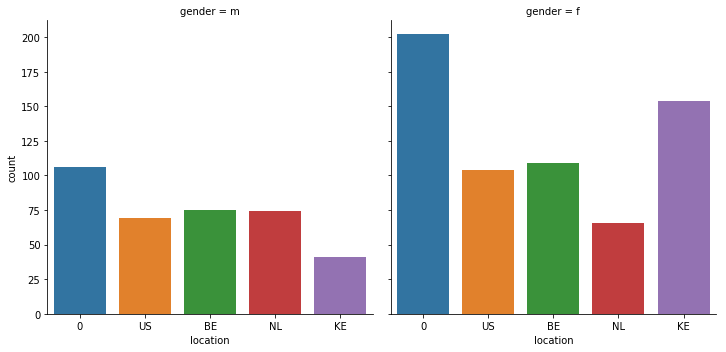

In [13]:
sns.catplot(data=df, x='location', col = 'gender', kind='count', ci=False);

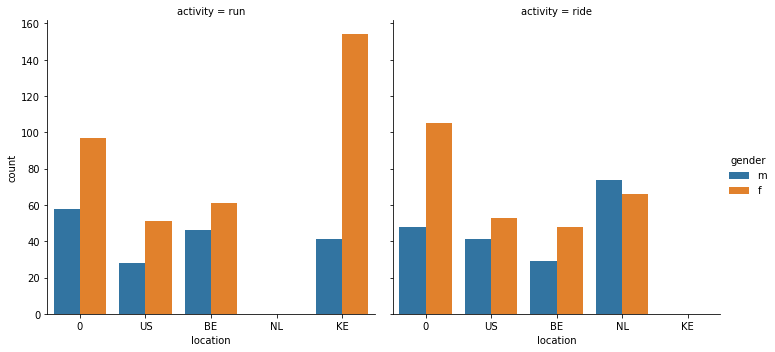

In [14]:
sns.catplot(data=df, x='location', col = 'activity' ,hue = 'gender', kind='count', ci=False);

In [15]:
#checking how many users and records are available for the non specified location
df0 = df[df.location == '0'][['user']]
print("The number of unique users for the unspecified location is " + str(df0['user'].nunique()) + " .")
print("The number of records forthe unspecified location is " + str(df0['user'].count()) + " .")

The number of unique users for the unspecified location is 29 .
The number of records forthe unspecified location is 308 .


What is the age distribution? Does it vary with gender?

C:\Users\Eleean.SCR4TCH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


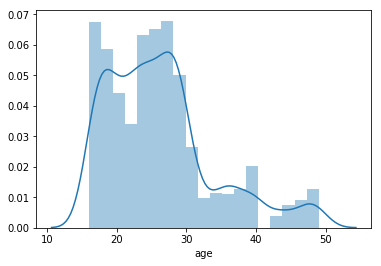

In [16]:
# distplot showing a non-even distribution based on age
sns.distplot(df['age']);

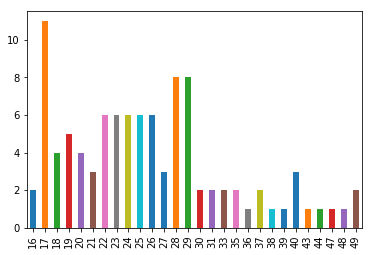

In [17]:
# a clearer plot showing the count by age of users
ages = df.groupby('user').first().age.value_counts().sort_index()
ages.plot.bar(x = 'age', y = 'count')

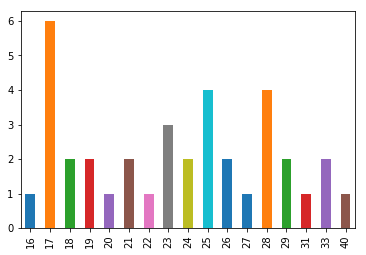

In [18]:
#checking if the distribution is the same across genders
dfmale = df[df.gender=='m'][['user','age', 'location','speed','activity']]
agesmale = dfmale.groupby('user').first().age.value_counts().sort_index()
agesmale.plot.bar(x = 'age', y = 'count')

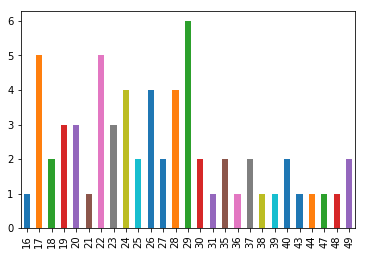

In [19]:
# male population seems to be underrepresented, so cross-check with female
dffemale = df[df.gender=='f'][['user','age', 'location','speed','activity']]
agesfemale = dffemale.groupby('user').first().age.value_counts().sort_index()
agesfemale.plot.bar(x = 'age', y = 'count')

In [20]:
dffemale.groupby(['location'])['age'].median()

location
0     27
BE    27
KE    28
NL    24
US    22
Name: age, dtype: int64

In [21]:
dfmale.groupby(['location'])['age'].median()

location
0     24
BE    23
KE    24
NL    28
US    21
Name: age, dtype: int64

What is the most popular weekday according to the sport tracker? Does it vary according to gender? Is the amount of records consistent across the two months?

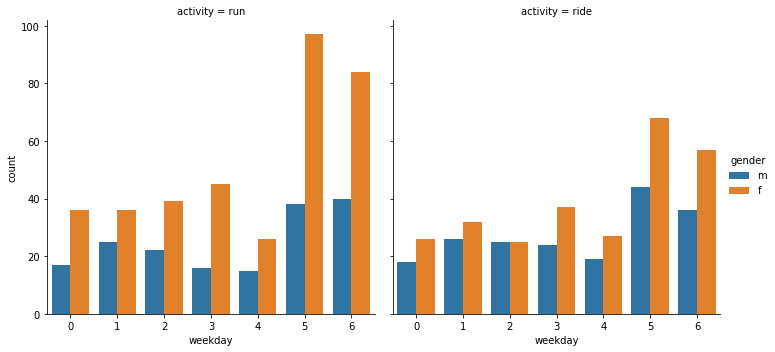

In [22]:
sns.catplot(data=df, x='weekday', col = 'activity' ,hue = 'gender', kind='count', ci=False);

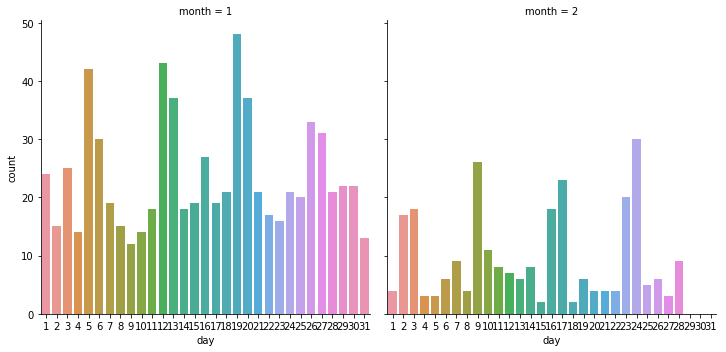

In [23]:
# catplot of days per month
sns.catplot(data=df, x='day', col='month',kind='count', ci=False)

In [24]:
len(df[df.month==2])

266

Does the speed at which the activities are performed differ according to type? How does speed differ based on gender?

As `speed` is been analysed, let's first check whether there is a mismatch between the US and other locations.

In [25]:
#checking if there is a difference between the US values, in case the distance value was calulated in miles.
dfUS = df[df.location=='US'][['activity', 'type', 'duration','distance','speed']]
dfnotUS = df[df.location!='US'][['activity', 'type', 'duration','duration', 'distance','speed','location']]

dfUS.groupby(['activity','type'])['speed'].mean()

activity  type   
ride      race       29.428000
          workout    27.229663
run       race        9.145000
          workout     8.441333
Name: speed, dtype: float64

In [26]:
dfnotUS.groupby(['activity','type'])['speed'].mean()

activity  type   
ride      race       29.625294
          workout    27.062663
run       race       15.157500
          workout    11.629977
Name: speed, dtype: float64

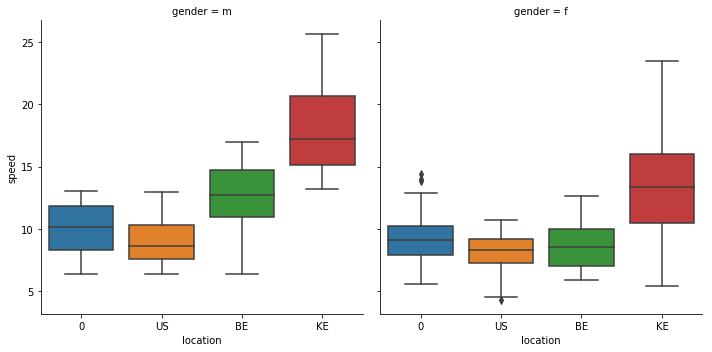

In [27]:
"""check where there is prevalence of faster runners to see if there is something odd with the data 
keeping in mind the absence of ride records for the location NL"""
dfrun = df[df.activity=='run'][['location','speed', 'gender']]
sns.catplot(x='location', y='speed', data=dfrun, col = 'gender', kind='box');

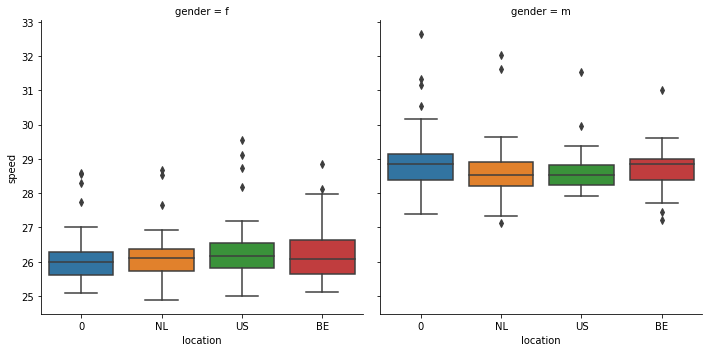

In [28]:
#check again the value for the other activity 
dfride = df[df.activity!='run'][['location','speed','gender']]
sns.catplot(x='location', y='speed', col = 'gender', data=dfride, kind='box');

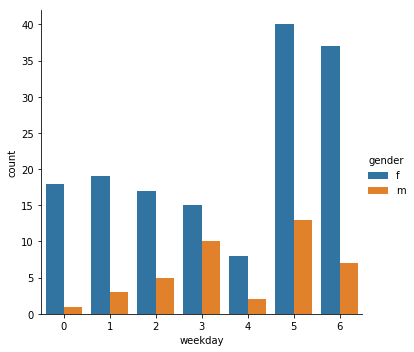

In [29]:
#is the increase of speed in Kenya due to the fact that people using the app tend to be professional athletes?
dfKE = df[df.location=='KE'][['gender','weekday']]
sns.catplot(data=dfKE, x='weekday',hue = 'gender', kind='count', ci=False);

In [30]:
#checking whether type influences speed
df.groupby(['activity','type'])['speed'].mean()

activity  type   
ride      race       29.580455
          workout    27.096290
run       race       14.155417
          workout    11.162891
Name: speed, dtype: float64

In [31]:
#checking whether gender influences speed, by first taking out race
dfworkout = df[df.type != 'race'][['gender', 'activity','speed']]
dfworkout.groupby(['activity','gender'])['speed'].mean()

activity  gender
ride      f         26.026202
          m         28.596739
run       f         10.536327
          m         12.434556
Name: speed, dtype: float64

## Results

While it is impossible to infer a general pattern of behaviour relative to sport tracking apps in general, it is possible to advance tentative guesses regarding the population recorded, bearing in mind that, especially due to non-consistency of the data available, it is impossible to infer conclusive interpretations. In particular, it is to be taken into consideration that the data is gathered through a sport tracker app across few locations and limited timeframe and limited users. 

The ___gender___ count is biased towards female users of the app across all countries recorded, with the exception of the Netherlands, which records a slightly higher count of usage for male users with an even number of unique users per gender (m = 8, f = 8). 

It is worth mentioning the the male population over thirty is underrepresented by the app, and this might in part influence the users' count being tilted towards female users. It might also partially influence the ___age___ results, which display a prevalence of users under thirty.

Regarding the two ___activities___, running seems to be the preferred option for both male and female users. There is however a peculiar trend relative to locations, showing an absolute prefernce for running in Kenya and for riding in the Netherlands. 

Of the five ___locations___, one remains unspecified. There are 29 unique users, for a total of 308 records, with no location specification. It can be assumed they are not located in the US, as the dates recorded for these users does not match the US one. 

Users across location and gender appear to favor the use of the tracker during the weekend. This preference regarding ___weekdays___ is in line with the assumption that weekends are usually devolved to non-working activities. 

The usage count is drastically reduced for the ___month___ of February (the records' count is 734 in January, 266 in February). While it is possible to see the clear trend of people using the app more during the weekend in both months, there is no linear decrease from month 1 to month 2. The number of unique users for the month of February is 94 (out of the total 100), so the reduction in number is not due specifically to few people using the tracker, but to the tracker being used less, or better to fewer activities displayed in the records. The app displays records from different places, in different continents, therefore it is unlikely that the cause of this odd pattern is a contextual event taking place in February. The latter, together with the fact that the trend does not decrese linearly but discretely in the second month, seems to suggest the anomaly to be due to uneven data gathering across months (734 records for January vs 266 for February), rather than the presence of a motivated pattern. Therefore, the cause might be a mistake at the dataset building stage.

The data seems to suggest that speed varies according to the ___type___ of usage (workout or race), which would not be surprising as for the latter the aim is to beat an opponent by being faster. On the other hand, the increased value for the second type might also be due to the lower number of records associated, therefore to lower variability in the sample available. 

The data shows an increase in ___speed___ for users located in Kenya, which seems not to be due to users being professionally versed in running, as the tracker shows the same pattern of increased usage during the weekend. On the other hand, it is also possible that this particular app might be preferred for non-professional use, therefore disproving my claim. 

Finally, male users appear to be faster than female ones across all locations examined. It is worth mentioning that, although the patter seems to be consistent, the data accounts for fewer male unique users and records, so the sample might not be representative enough to determine a decisively conclusion according to the data in exam.